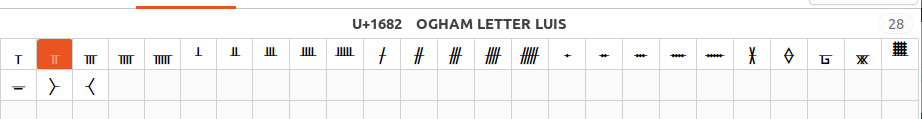

In [1]:
ogham_chars = {
    'B':u'\U00001681',
    'L':u'\U00001682',
    'F':u'\U00001683',
    'S':u'\U00001684',
    'N':u'\U00001685',
    'H':u'\U00001686',
    'D':u'\U00001687',
    'T':u'\U00001688',
    'C':u'\U00001689',
    'Q':u'\U0000168a',
    'M':u'\U0000168b',
    'G':u'\U0000168c',
    'NG':u'\U0000168d',
    'Z':u'\U0000168e',
    'R':u'\U0000168f',
    'A':u'\U00001690',
    'O':u'\U00001691',
    'U':u'\U00001692',
    'E':u'\U00001693',
    'I':u'\U00001694',
    'EA':u'\U00001695',
    'OI':u'\U00001696',
    'UI':u'\U00001697',
    'IA':u'\U00001698',
    'AE':u'\U00001699',
    'P':u'\U0000169a',
    'start':u'\U0000169b',
    'end':u'\U0000169c',
    'V':u'\U00001683',
}

In [2]:
import os
image_urls = {}
HTML_DIR = '040 - images'
for fn in os.listdir(HTML_DIR):
    full_name = os.path.join(HTML_DIR, fn)
    insc = fn[:-6]
    if insc in image_urls:
        image_urls[insc] = image_urls[insc] + [fn]
    else:
        image_urls[insc] = [fn]


In [7]:
import json

json_file = open('020-sqlite/ogham.json')
data = json.load(json_file)
inscriptions = []

def getOgham(c):
    if c not in ogham_chars:
        return c
    return ogham_chars[c]

for d in data:
    insc = {}
    name = f"{d['Site']}_{d['Stone']}_{d['Inscription']}"
    insc["name"] = name
    insc["names"] = [name]
    insc["site"] = d["SiteName"]
    
    if d["Script"] in ["ogham", "oghms"]:
        insc["transcription"] = ''.join([getOgham(l) for l in d["Text"]])
        insc["parsedInscription"] = ''.join([getOgham(l) for l in d["Text"]])
        
        insc["words"] = []
        for w in d["Expansion"].split(' '):
            insc["words"] += [''.join([getOgham(l) for l in w])]
    else:
        insc["transcription"] = d["Text"]
        insc["parsedInscription"] = d["Text"]
        insc["words"] = []
        for w in d["Expansion"].split(' '):
            insc["words"] += [w]
        
    insc["translatedWords"] = []
    for w in d["Expansion"].split(' '):
        insc["translatedWords"] += [w]
    insc["transliteratedWords"] = []
    for w in d["Expansion"].split(' '):
        insc["transliteratedWords"] += [w]

    insc["support"] = d["Support"]

    insc["images"] = []
    if name in image_urls:
        for img in image_urls[name]:
            insc["images"] += [f"images/{img}"]
            
    insc["imageRights"] = ""
    insc["imageRightsURL"] = ""
    insc["facsimileImages"] = []
    insc["scribe"] = ""
    insc["context"] = ""
    insc["findspot"] = ""
    
    inscriptions += [[name,insc]]

output_file = open("../OghamInscriptions.js", "w")
output_file.write("var inscriptions = new Map(\n")
output_file.write(json.dumps(inscriptions, sort_keys=True, indent=4, ensure_ascii=False))
output_file.write(");\n")
output_file.flush()


In [8]:
from collections import defaultdict
word_count = defaultdict(int)
for d in data:
    insc = {}
    if d["Script"] in ["ogham", "oghms"]:
        insc["words"] = []
        for w in d["Expansion"].split(' '):
            tw = ''.join([getOgham(l) for l in w])
            word_count[tw] += 1
    else:
        insc["words"] = []
        for w in d["Expansion"].split(' '):
            word_count[w] += 1

word_count_list = [[w,c] for w,c in word_count.items()]
output_file.write("var wordsInCorpus = new Map(\n")
output_file.write(json.dumps(word_count_list, sort_keys=True, indent=4, ensure_ascii=False))
output_file.write(");\n")

output_file.write("var lexicon = new Map()\n")
output_file.write("var ligatures = new Map()\n")

output_file.flush()